In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds="/kaggle/input/tomato/train"
test_ds="/kaggle/input/tomato/valid"

In [3]:
os.listdir('/kaggle/input/tomato/train')

['Late_blight',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Septoria_leaf_spot',
 'Early_blight',
 'Spider_mites Two-spotted_spider_mite',
 'powdery_mildew',
 'healthy',
 'Bacterial_spot',
 'Target_Spot',
 'Tomato_mosaic_virus',
 'Leaf_Mold']

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                 


valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 25851 images belonging to 11 classes.
Found 6683 images belonging to 11 classes.


In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [7]:
img= train_generator[0]
print(img)

(array([[[[209.      , 220.      , 160.      ],
         [209.      , 220.      , 160.      ],
         [209.      , 220.      , 160.      ],
         ...,
         [ 38.035297,  52.035297,  52.035297],
         [ 42.031155,  54.      ,  54.06231 ],
         [ 43.29282 ,  54.29282 ,  56.488033]],

        [[209.      , 220.      , 160.      ],
         [209.      , 220.      , 160.      ],
         [209.      , 220.      , 160.      ],
         ...,
         [ 38.035076,  52.035076,  52.035076],
         [ 42.031376,  54.      ,  54.062756],
         [ 43.293488,  54.293488,  56.489147]],

        [[209.      , 220.      , 160.      ],
         [209.      , 220.      , 160.      ],
         [209.      , 220.      , 160.      ],
         ...,
         [ 38.03485 ,  52.03485 ,  52.03485 ],
         [ 42.0316  ,  54.      ,  54.063198],
         [ 43.294155,  54.294155,  56.490257]],

        ...,

        [[ 69.      , 101.      ,  60.      ],
         [ 69.      , 101.      ,  60.      

In [8]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [9]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 11)


In [10]:
print(len(train_generator))
print(len(test_ds))

808
26


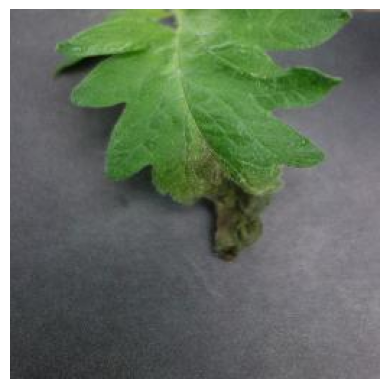

In [11]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/tomato/train/Late_blight/014eee0c-8000-4762-b4b8-63ecc2fadc13___GHLB2ES Leaf 69.1.JPG"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D



In [13]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(11, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [14]:
model = VGG19((224, 224, 3))

In [15]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [16]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [17]:
history =model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
808/808 [==============================] - 634s 762ms/step - loss: 1.9815 - accuracy: 0.2762 - val_loss: 1.6173 - val_accuracy: 0.4396
Epoch 2/15
808/808 [==============================] - 502s 621ms/step - loss: 1.2562 - accuracy: 0.5613 - val_loss: 1.3115 - val_accuracy: 0.5828
Epoch 3/15
808/808 [==============================] - 501s 620ms/step - loss: 0.9713 - accuracy: 0.6651 - val_loss: 1.0259 - val_accuracy: 0.6523
Epoch 4/15
808/808 [==============================] - 498s 616ms/step - loss: 0.8165 - accuracy: 0.7168 - val_loss: 0.7908 - val_accuracy: 0.7425
Epoch 5/15
808/808 [==============================] - 502s 620ms/step - loss: 0.7202 - accuracy: 0.7496 - val_loss: 0.7721 - val_accuracy: 0.7606
Epoch 6/15
808/808 [==============================] - 497s 615ms/step - loss: 0.6488 - accuracy: 0.7746 - val_loss: 0.8193 - val_accuracy: 0.7381
Epoch 7/15
808/808 [==============================] - 494s 610ms/step - loss: 0.5903 - accuracy: 0.7944 - val_loss: 1.0826 -

In [18]:
n_categories = len(os.listdir('/kaggle/input/tomato/valid'))# number of categories print(n_categories)

In [19]:
n_categories

11

In [20]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.981513,0.276160,1.617345,0.439623
1,1.256184,0.561255,1.311476,0.582822
2,0.971270,0.665119,1.025925,0.652252
3,0.816538,0.716800,0.790798,0.742481
4,0.720173,0.749604,0.772110,0.760587


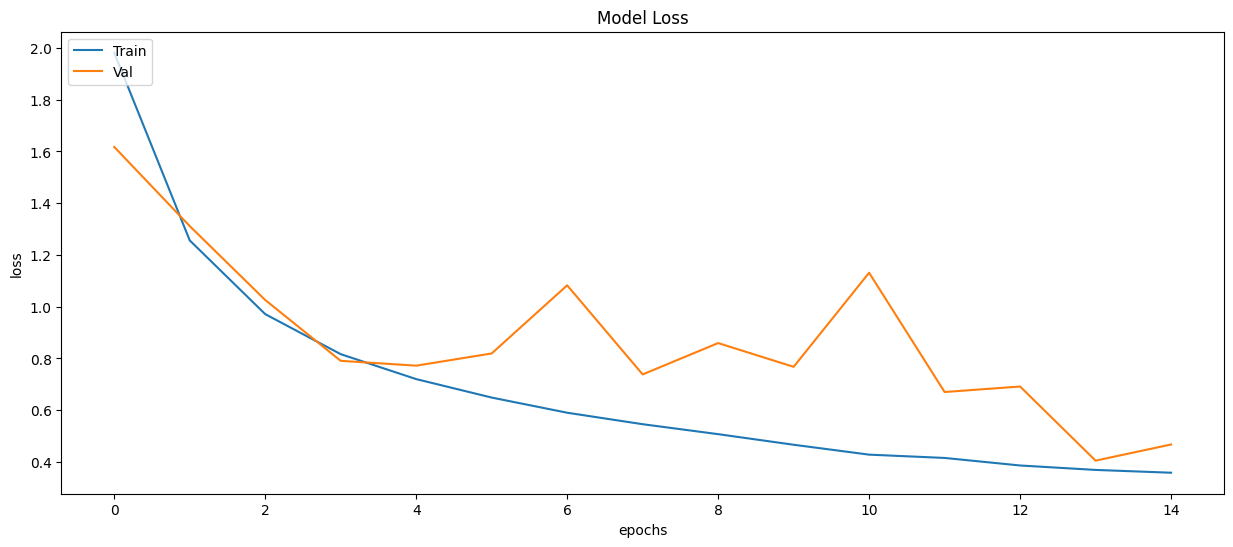

In [21]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

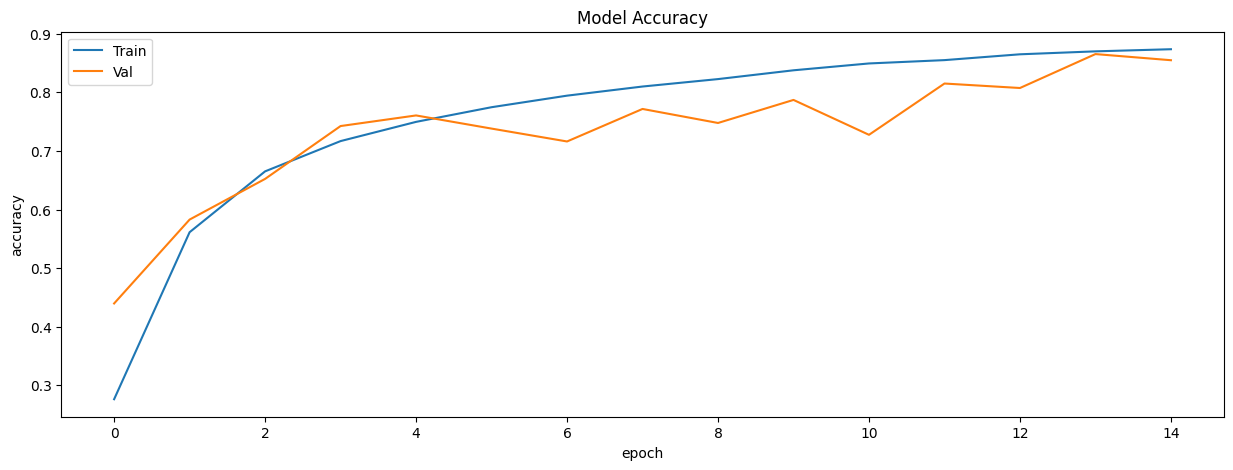

In [22]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [23]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

209/209 [==============================] - 38s 183ms/step


In [24]:
results =model.evaluate(test_generator)

209/209 [==============================] - 38s 182ms/step - loss: 0.4675 - accuracy: 0.8549


8/8 [==============================] - 1s 160ms/step


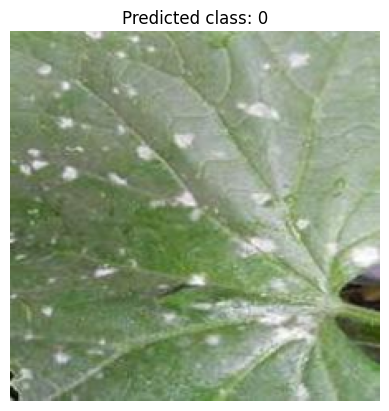

In [27]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/tomato/valid/powdery_mildew'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [28]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {test_ds[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : /
Class probability: 0.13179481
Predicted class for 2.jpg : /
Class probability: 0.155896
Predicted class for 3.jpg : /
Class probability: 0.15554641
Predicted class for 4.jpg : /
Class probability: 0.14001794
Predicted class for 5.jpg : /
Class probability: 0.13821001
Predicted class for 6.jpg : /
Class probability: 0.1586601
Predicted class for 7.jpg : /
Class probability: 0.14467575
Predicted class for 8.jpg : /
Class probability: 0.1583092
Predicted class for 9.jpg : /
Class probability: 0.14783244
Predicted class for 10.jpg : /
Class probability: 0.13417555
Predicted class for 11.jpg : /
Class probability: 0.15008508
Predicted class for 12.jpg : /
Class probability: 0.14480704
Predicted class for 13.jpg : /
Class probability: 0.13351679
Predicted class for 14.jpg : /
Class probability: 0.13862738
Predicted class for 15.jpg : /
Class probability: 0.15527731
Predicted class for 16.jpg : /
Class probability: 0.15342113
Predicted class for 17.jpg : /
Class 